# **Supervised Learning - Multiple Linear Regression**

* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploraroty Data Analysis](#3)
* [4. Data Processing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)
* [7. Improving a model](#7)

<a name='1'></a>

## 1. Problem Formulation

There is a real state agent who knows that you're a Machine Learning Engineer and would like to help out with building a machine learning model that can predict the price of the house given the information about that particular house.


<a name='2'></a>

## 2. Collecting the data

Let's get the real data. You can learn more about the data at [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
cal_data = pd.read_csv('housing.csv')

Now that we have real world data, let's see how it looks like.

In [ ]:
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cal_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND



```
Information about the features

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Source: Kaggle
```


In [ ]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
len(cal_data)

20640

In [ ]:
len(cal_data.columns)

10

So, we have 20640 data points and 10 features. In those 10 features, 9 features are input features and the feature `median_house_value` is the target variable/label.

<a name='3'></a>

## 3. Exploratory Data Analysis

**Checking data statistics**

In [ ]:
cal_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Checking Missing Values**

In [ ]:
cal_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


We only have missing values in the `total_bedrooms` feature. To go beyond a little bit, here is the percentage of the missing values in such feature.

In [ ]:
print('The Percentage of missing values in total_bedrooms is: {}%'.format(cal_data.isnull().sum()['total_bedrooms'] / len(cal_data) * 100))

The Percentage of missing values in total_bedrooms is: 1.002906976744186%


**Checking Values in the Categorical Feature(s)**

In [ ]:
cal_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


<Axes: xlabel='ocean_proximity', ylabel='count'>

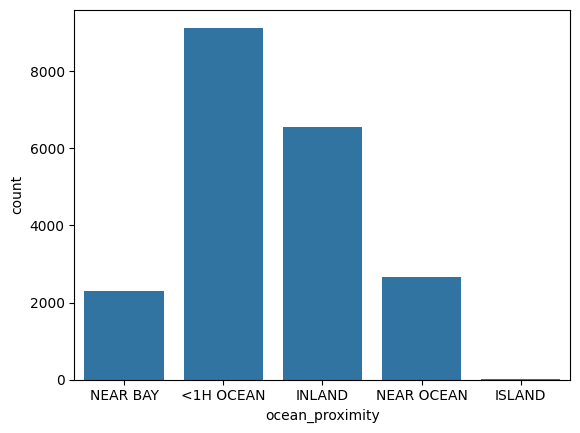

In [ ]:
sns.countplot(data=cal_data, x='ocean_proximity')

**Checking Correlation Between Features**

<Axes: >

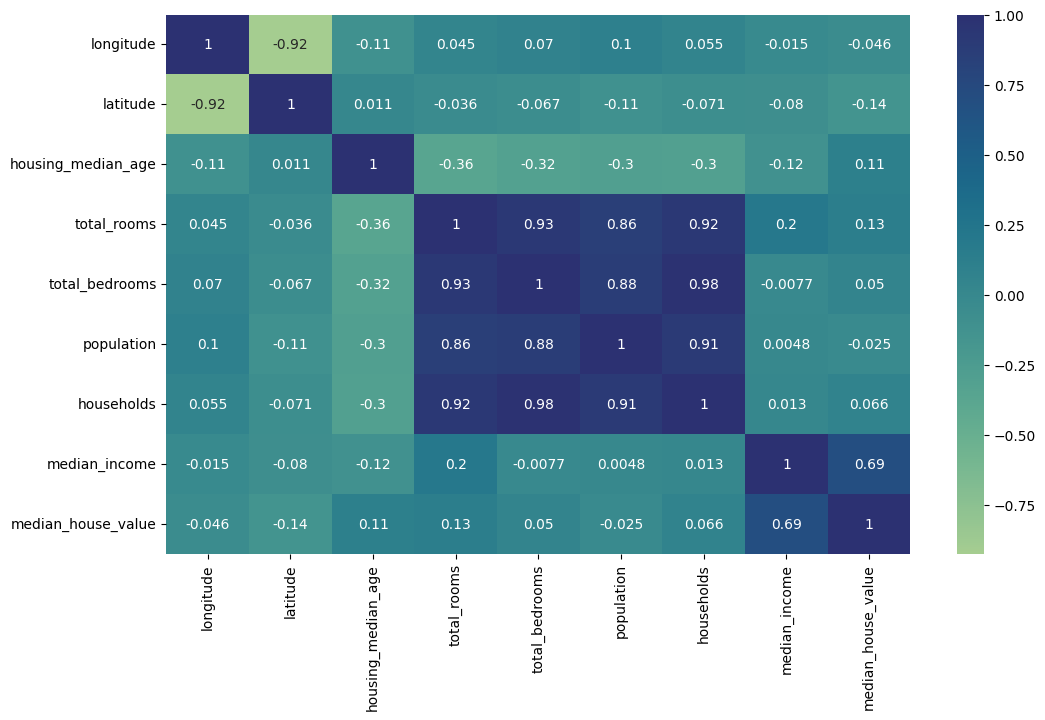

In [ ]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(cal_data.corr(numeric_only=True),annot=True,cmap='crest')

Some features like total_bedrooms and households are highly correlated. Same things for `total_bedrooms` and `total_rooms` and that makes sense because for many houses, the number of people who stay in that particular house (`households`) goes with the number of available rooms(`total_rooms`) and `bed_rooms`.

The other interesting insights is that the `price of the house` is closely correlated with the `median income`, and that makes sense too. For many cases, you will resonably seek house that you will be able to afford based on your income.

**Plotting Geographical Features**

<Axes: xlabel='longitude', ylabel='latitude'>

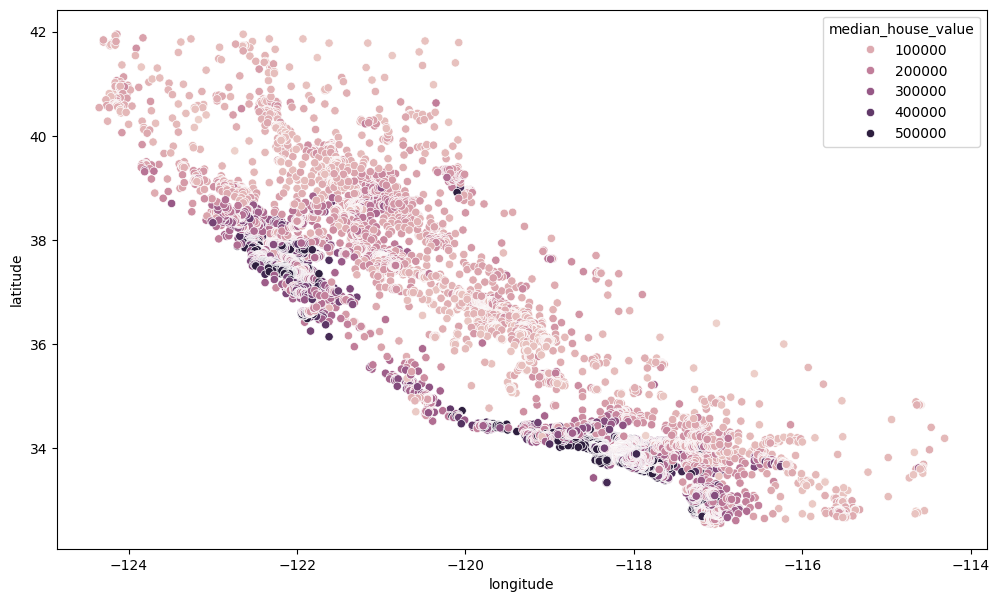

In [ ]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = cal_data, x='longitude', y='latitude', hue='median_house_value')

It makes sense that the most expensive houses are those close to sea. We can verify that with the `ocean_proximity`.

<Axes: xlabel='longitude', ylabel='latitude'>

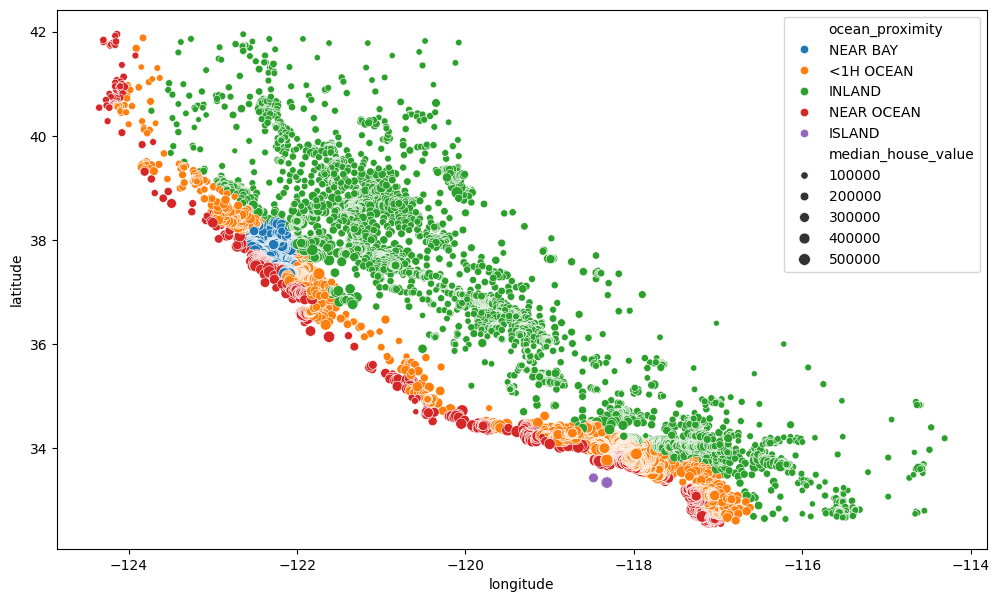

In [ ]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = cal_data, x='longitude', y='latitude', hue='ocean_proximity',
                size='median_house_value')

To summarize the data exploration, the goal here it to understand the data as much as you can. There is no limit to what you can inspect. And understanding the data will help you build an effective ML systems.

<a name='4'></a>

## 4. Data Preprocessing

In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

Here are three most things that we will take care of in our dataset:

* Missing values
* Encoding categorical features
* Scaling numerical features


As much as we can we will use functions so that we can rerun the same transformations on the test set.

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being `median_house_value`. Since the data is a Pandas dataframe, we will use `drop` function. Let's do that!

In [ ]:
input_data_X = cal_data.drop('median_house_value', axis=1)

labels_Y = cal_data['median_house_value']

In [ ]:
input_data_X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY


In [ ]:
labels_Y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


Great, input training data no longer contain the label.

**Handling Missing Values**

Missing values are inevitable in real world datasets, so it's good to know how to handle them.

There are three options when dealing with missing values. You can:

* Remove them completely
* Fill them with different strategies such as mean, median, frequent, or constant.
* Leave them as they are. Most ML models don't appreciate missing values, and so they can't handle them but there are some models which are not affected by missing values, such as tree based algorithms. Since we are working with linear models for now, this is not an option.


Sklearn provides a function called `SimpleImputer` to fill missing values. Let' use it. We will fill the values with the mean of the concerned features. You can also use median, or most frequent values.

#### One Hot Encoding

One hot encoding is most preferred when the categories are not in any order and that is exactly how our categorical feature is. This is what I mean by saying unordered categories: If you have 3 cities and encode them with numbers (1,2,3) respectively, a machine learning model may learn that city 1 is close to city 2 and to city 3. As that is a false assumption to make, the model will likely give incorrect predictions if the city feature plays an important role in the analysis.

On the flip side, if you have the feature of ordered ranges like low, medium, and high, then numbers can be an effective way because you want to keep the sequence of these ranges.

In our case, the ocean proximity feature is not in any order. By using one hot, The categories will be converted into binary representation (1s or 0s), and the orginal categorical feature will be splitted into more features, equivalent to the number of categories.

**Identify numerical and categorical features**

In [ ]:
num_feats = input_data_X.drop('ocean_proximity', axis=1)
cat_feats = input_data_X[['ocean_proximity']]

### **Putting All Data Preprocessing Steps Into A Single Pipeline**

Having data pipelines allows us to run data processing seamlessly. In this final step, we are going to do two things:

* Creating a numerical pipeline having all numerical preprocessing steps (handling missing values and standardization)
* Creating a categorical pipeline to encode the categorical features
* Combining both pipelines into one pipeline.

Let's do it!!

#### Creating a numerical features pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Numerical pipeline
steps_num = [('imputer', SimpleImputer(strategy='constant', fill_value=0)),
             ('scaler', StandardScaler())]

num_feats_pipe = Pipeline(steps_num)

How cool is that!! With only just handful of codes, we made a pipeline which can take numerical features, impute the missing values, and scale the features as well. Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.

You can access the transformation steps. Here is how:

In [ ]:
num_feats_pipe.steps[0]

('imputer', SimpleImputer(fill_value=0, strategy='constant'))

In [ ]:
num_feats_pipe.steps[1]

('scaler', StandardScaler())

#### Pipeline for transforming Categorical Features

Even if we are only encoding categorical features, let's still use a pipeline for identity. And if you had more preprocessing functions to be done on the categorical features, you can add them in the pipeline.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Categorical pipeline
steps_cat = [('encoder', OneHotEncoder())]

cat_feats_pipe = Pipeline(steps_cat)

#### Final Data Processing Pipeline

Here, we are going to make a single tranformer which will do all numerical and categorical features transformations. We will use `ColumnTransformer` for that purpose. Learn more about it from the [official documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose).

In [ ]:
from sklearn.compose import ColumnTransformer

# Combine pipelines
num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_feats_pipe, num_list),
    ('cat', cat_feats_pipe, cat_list)
])

# Fit and transform the data
training_data_preprocessed = final_pipe.fit_transform(input_data_X)

#### Convert back to pandas DataFrame

In [ ]:
# Get the column names after preprocessing
encoded_cat_features = final_pipe.named_transformers_['cat']['encoder'].get_feature_names_out(cat_list)
all_features = num_list + list(encoded_cat_features)
training_data_preprocessed_df = pd.DataFrame(training_data_preprocessed, columns=all_features)

# Display the first few rows
training_data_preprocessed_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.954593,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.356913,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.810272,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.703806,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.597339,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Visualize Pipeline - Concluded here
from sklearn import set_config
set_config(display='diagram')
final_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['ocean_proximity'])])

So, now we have a data that is well prepared to be fed to machine learning model.

# **Model Building: Regressions**

In [ ]:
#Splitting testdata into X_train,X_test,y_train,y_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(training_data_preprocessed_df,labels_Y,test_size=.20,random_state=7)

<a name='5'></a>

## 5. Choosing and Training a model

You have probably heard the notion that a machine learning is only 5% or so of the whole ML project, the rest percentage being for data processing. And that is true, we have spent a lot of time dealing with data.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## **Linear Regression**

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # coefficents, intercept

# Predict on the test set
y_pred_lr = lr_model.predict(X_test) # targets are not provided w0x0+w1x1+w2x2 + b = price

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression\nMSE: {mse_lr}\nR2: {r2_lr}")

Linear Regression
MSE: 4808667987.583411
R2: 0.6424826004391035


## **KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

para = {
    'n_neighbors': [3, 5, 7, 9, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
 # Total 8 combinations of KNNRegressor will be run by GridSearch

n_neighbors=9:

    This specifies the number of nearest neighbors to consider when making predictions.
    For each input data point, the algorithm finds the 9 nearest points (in terms of distance in the feature space).
    These neighbors are used to calculate the predicted value for the given point.

weights='distance':

    This determines how the neighbors' contributions are weighted in the prediction.
    When weights='distance', closer neighbors have a greater influence on the predicted value compared to farther ones.
    The weight is typically inversely proportional to the distance (e.g., closer neighbors might have weights of 1/d1/d, where dd is the distance).

If weights were set to 'uniform' (default), all neighbors would contribute equally regardless of their distance.

In [ ]:
housing_reg=GridSearchCV(KNeighborsRegressor(),para,cv=10)

housing_reg.fit(X_train,y_train)

housing_reg.best_score_

0.7474458839066543

In [ ]:
housing_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

weights='distance' is particularly useful when you expect that closer points provide more relevant information for prediction compared to farther points.
Example: Predicting house prices where properties nearby (in terms of location or features) are more indicative of the value than distant ones.

How Predictions Are Made

    For a given input point, the algorithm:
        Finds the 9 nearest neighbors in the training data.
        Computes a weighted average of their target values, where the weights are determined by their distance to the input point.

In [ ]:
# Initialize and train the KNN Regressor
KNN_reg = KNeighborsRegressor(n_neighbors=12, weights='distance')
KNN_reg.fit(X_train,y_train)

# Predict on the test set
y_pred_knn =KNN_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNearestNeighbour\nMSE: {mse_knn}\nR2: {r2_knn}")

KNearestNeighbour
MSE: 3716031471.451716
R2: 0.7237185200162826


## **Decision Tree**

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree\nMSE: {mse_dt}\nR2: {r2_dt}")

Decision Tree
MSE: 5001338816.757025
R2: 0.6281578073788929


## **Random Forest**

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest\nMSE: {mse_rf}\nR2: {r2_rf}")

Random Forest
MSE: 2523537588.9828434
R2: 0.8123786880614472


## **Gradient Boosting**

In [ ]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting\nMSE: {mse_gb}\nR2: {r2_gb}")

Gradient Boosting
MSE: 3184510497.895313
R2: 0.7632363234430606


# **Model Comparison**

In [ ]:
# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'KNearestNeighbour', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf, mse_gb],
    'R2 Score': [r2_lr, r2_knn, r2_dt, r2_rf, r2_gb]
})

model_comparison

,Model,MSE,R2 Score
0,Linear Regression,4.808668e+09,0.642483
1,KNearestNeighbour,3.716031e+09,0.723719
2,Decision Tree,5.001339e+09,0.628158
3,Random Forest,2.523538e+09,0.812379
4,Gradient Boosting,3.184510e+09,0.763236


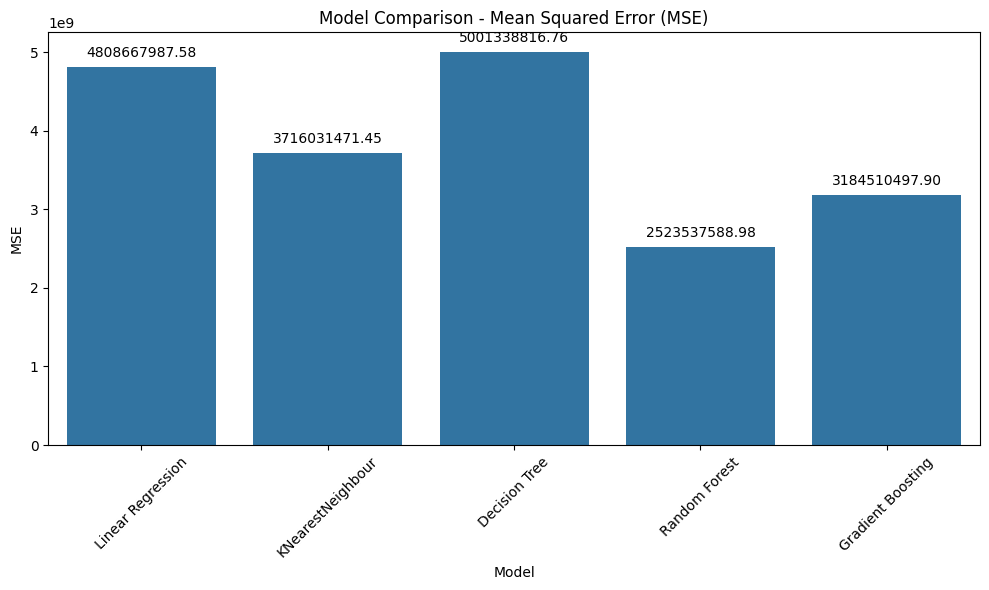

In [ ]:
# Plot the comparison of MSE
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', data=model_comparison)
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

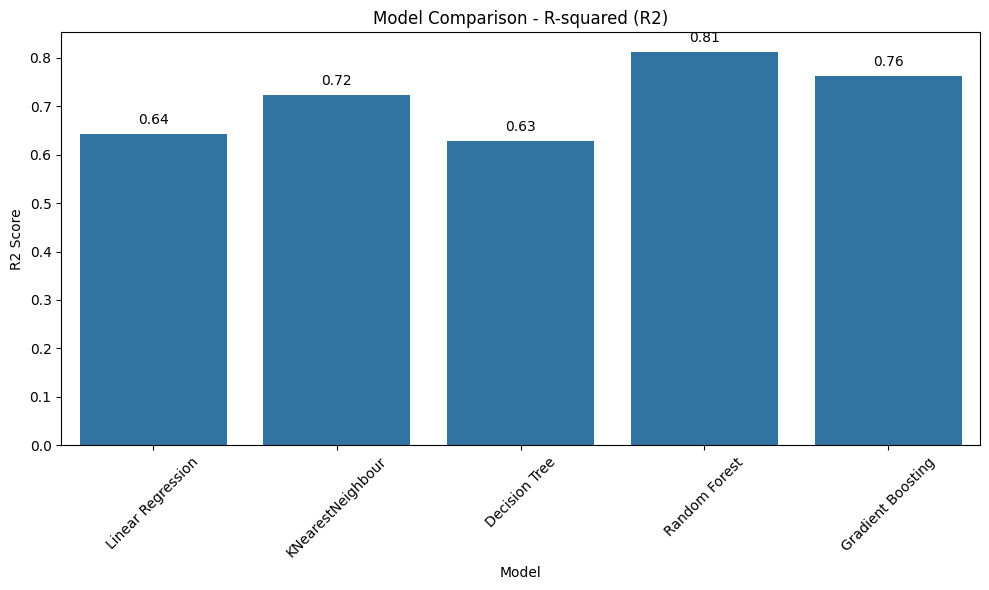

In [ ]:
# Plot the comparison of R2
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2 Score', data=model_comparison)
plt.title('Model Comparison - R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

1. **Mean Squared Error (MSE)**
    - **Lower MSE** indicates better performance.
    - **Random Forest** has the lowest MSE (2.5235), followed by **Gradient Boosting** (3.1845), **KNearestNeighbour** (3.71603), and **Linear Regression** (4.8086).

2. **R-squared (R2)**
    - **Higher R2** indicates better performance.
    - **Random Forest** has the highest R2 (0.81), followed by **Gradient Boosting** (0.76), **KNearestNeighbour** (0.72), and **Linear Regression** (0.64).


So,
- **Random Forest** performs the best in terms of both MSE and R2. It has the lowest MSE and the highest R2, indicating that it is the most accurate and explains the most variance in the data.
- **Gradient Boosting** is the second-best model, with a relatively low MSE and a high R2.
- **Decision Tree** and **Linear Regression** have higher MSE and lower R2 values, indicating that they are less accurate and explain less variance in the data compared to the other models.